## Exercise Notes

You may wish to use Jupyter notebooks to complete this exercise or you might prefer to write Python code and run it via the terminal, use an IDE like PyCharm, or some other technology stack. Feel free to use any technology stack and workflow you are comfortable with. Our goal is to provide an exercise that helps you learn solidify Deep Learning concepts and the details of the Keras framework—not to enforce a specific workflow, tool, or strategy for executing Python code.

This exercise should take between 30 minutes and 1 hour to complete. The provided Jupyter notebooks contain much of the information you need to complete this exercise. However, you should also expect to look up information from the Keras docs, the provided external reading material, and other sources. You are encouraged to search for information on your own.

Finally, this is not an exam. Correct answers are not provided. In fact, the exercise has enough ambiguity that many different answers will qualify as correct. You should be able to prove the correctness of your own answers using readily available tools—and in so doing you'll have learned quite a lot.

## The Exercise

You will build a few neural networks during this exercise, for all the networks you build you should:

* Build a network for classification using the built in MNIST dataset.
* Use the sigmoid activation function.
* Use the categorical cross entropy loss function.
* Use stochastic gradient descent as the optimizer.
* Train for at least 10 epochs.
* Plot a chart with your network's performance on training and validation data during training.

### Part One:

Use Keras to build a network with a single hidden layer and at least 300,000 trainable parameters. Answer the following questions about this model:

* How many total trainable parameters does this model have?
  * How many weights?
  * How many biases?
* How accurate was this model on the validation data after 10 epochs?
  * How different was the model's performance on the training data?
  * How different was the model's performance on the test data?
* About how long did each epoch take?



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_72 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 36us/sample - loss: 0.7602 - accuracy: 0.8051 - val_loss: 0.3829 - val_accuracy: 0.9143
Epoch 2/10
54000/54000 [==============================] - 2s 31us/sample - loss: 0.3859 - accuracy: 0.8993 - val_loss: 0.2908 - val_accuracy: 0.9255
Epoch 3/10
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3135 - accuracy: 0.9158 - val_loss: 0.2514 - val_accuracy: 0.9353
Epoch 4/10
54

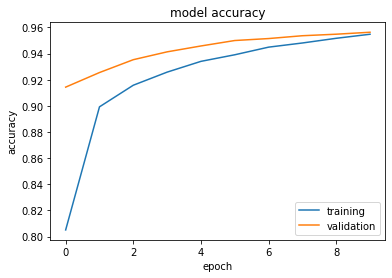

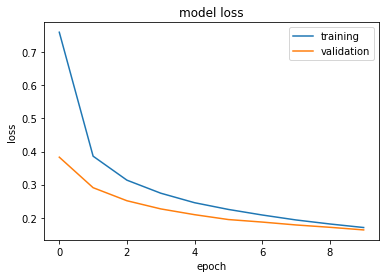

Test loss: 0.19
Test accuracy: 0.946


In [27]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

# convert X to one dimensional data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# convert labels to categorical
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

model = Sequential()

model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model)

* How many total trainable parameters does this model have?  407,050
  * How many weights?   784 * 512 + 512 *10 = 406528
  * How many biases?    512  + 10 = 522
* How accurate was this model on the validation data after 10 epochs?     0.943
  * How different was the model's performance on the training data?    a little less than the testing data, but close to
  * How different was the model's performance on the test data?        better than training data
* About how long did each epoch take? from 2s 31 us to 2 s 39 us/sample

Use Keras to build a network with a single hidden layer at fewer than 50,000 trainable parameters, then answer the same questions.

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 60)                47100     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 18us/sample - loss: 1.1493 - accuracy: 0.7060 - val_loss: 0.7017 - val_accuracy: 0.8605
Epoch 2/10
54000/54000 [==============================] - 1s 13us/sample - loss: 0.6545 - accuracy: 0.8501 - val_loss: 0.5002 - val_accuracy: 0.8968
Epoch 3/10
54000/54000 [==============================] - 1s 13us/sample - loss: 0.5189 - accuracy: 0.8778 - val_loss: 0.4164 - val_accuracy: 0.9103
Epoch 4/10
5400

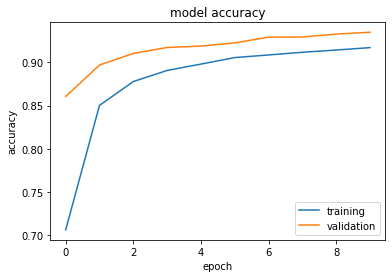

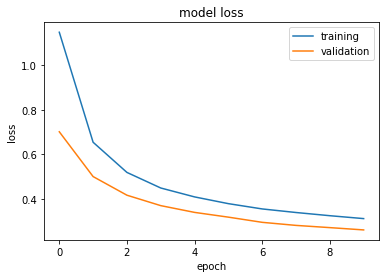

Test loss: 0.303
Test accuracy: 0.918


In [28]:
model = Sequential()

model.add(Dense(units=60, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model)

* How many total trainable parameters does this model have?  47,710
  * How many weights?   784 * 60 + 60 *10 = 47,640
  * How many biases?    60  + 10 = 70
* How accurate was this model on the validation data after 10 epochs?     0.919
  * How different was the model's performance on the training data?     less than the testing data, worse than first model
  * How different was the model's performance on the test data?        better than training data, worse than the first model
* About how long did each epoch take? from 1s 11 us to 1s 17 us/sample

### Part Two:

Use Keras to build 3 networks, each with at least 10 hidden layers such that:

* The first model has fewer than 10 nodes per layer.
* The second model has between 10-50 nodes per layer.
* The third model has between 50-100 nodes per layer.

Then, answer these questions:  

* Did any of these models achieve better than 20% accuracy on validation or test data?
  * State a hypothesis about why these networks performed the way they did.
  * *An answer to this question is given in a notebook from the next section [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)*
* How many total trainable parameters do each of these models have?
* Is there a clear correlation between number of trainable parameters and accuracy?
  * Consider your results from part one in answering this question.

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_36 (Dense)             (None, 8)               

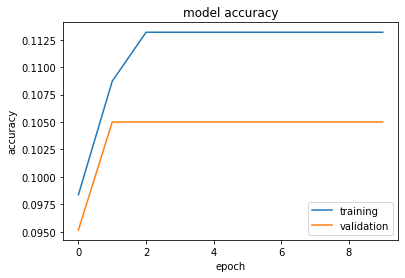

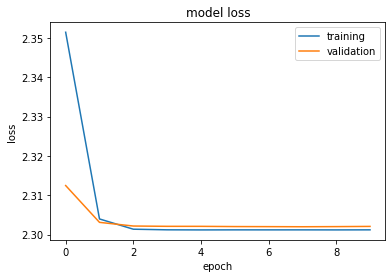

Test loss: 2.3
Test accuracy: 0.113


In [22]:
# model 1

model = Sequential()

model.add(Dense(units=8, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=8, activation='sigmoid', ))
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_44 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_47 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_48 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_49 (Dense)             (None, 50)              

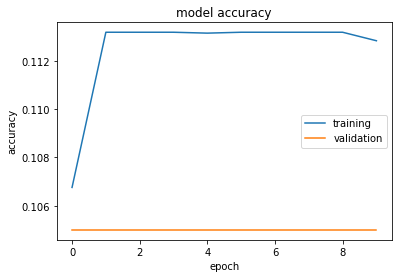

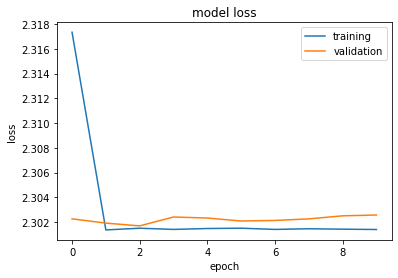

Test loss: 2.3
Test accuracy: 0.113


In [23]:
# model 2

model = Sequential()

model.add(Dense(units=50, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=50, activation='sigmoid', ))
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_57 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_60 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_62 (Dense)             (None, 100)             

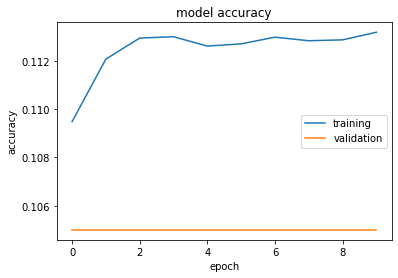

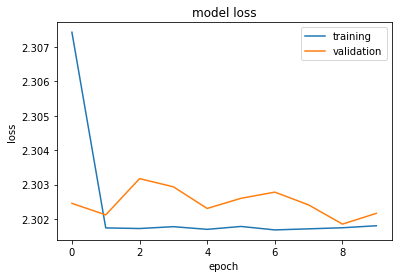

Test loss: 2.3
Test accuracy: 0.113


In [25]:
# model 3

model = Sequential()

model.add(Dense(units=100, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=100, activation='sigmoid', ))
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

plot_training_history(history, model)

* Did any of these models achieve better than 20% accuracy on validation or test data?   No
  * State a hypothesis about why these networks performed the way they did.
  * *An answer to this question is given in a notebook from the next section [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)*
* How many total trainable parameters do each of these models have?
* Is there a clear correlation between number of trainable parameters and accuracy?     No
  * Consider your results from part one in answering this question.

### Part Three:

Build a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data. You may need to train for more than 10 epochs to achieve this result.

* Compare your best results to the result you got in part one:
  * Which network achieved the best accuracy on test data after training?      Part III:  0.918 (part I) vs. 0.935 (part III)
  * Did the networks train for a similar number of epochs?             No.  10 (part I) vs. 50 (part III)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 96)                75360     
_________________________________________________________________
dense_88 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_89 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                650       
Total params: 86,378
Trainable params: 86,378
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 23us/sample - loss: 2.2857 - accuracy: 0.1615 - val_loss: 2.2484 - val_accuracy: 0.3497
Epoch 2/50
54000/54000 [=========================

54000/54000 [==============================] - 1s 19us/sample - loss: 0.2106 - accuracy: 0.9453 - val_loss: 0.1950 - val_accuracy: 0.9460
Epoch 50/50
54000/54000 [==============================] - 1s 19us/sample - loss: 0.2051 - accuracy: 0.9456 - val_loss: 0.1932 - val_accuracy: 0.9470


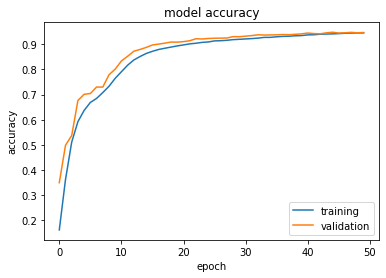

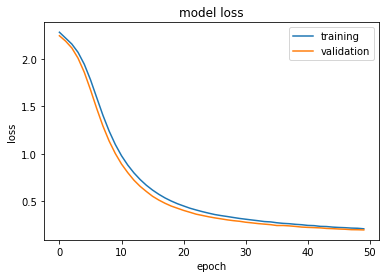

Test loss: 0.226
Test accuracy: 0.935


In [33]:
model = Sequential()

model.add(Dense(units=96, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=64, activation='sigmoid', ))
model.add(Dense(units=64, activation='sigmoid', ))

model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=True, validation_split=.1)

plot_training_history(history, model)